In [1]:
import numpy as np # linear algebra
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train_data = pd.read_csv(r"C:\Users\user\Downloads\train.csv.zip",header=0)
test_data = pd.read_csv(r"C:\Users\user\Downloads\test.csv.zip",header=0)


In [3]:
Label=train_data.pop('label')

In [4]:
train_data_images = np.reshape(train_data.values, (-1,28,28,1))

In [5]:
train_data_images = train_data_images/np.max(train_data_images)

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split (train_data_images,Label,test_size = 0.2,random_state=42)

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
def Digit_Recogniser_model():
    model = tf.keras.models.Sequential([ 
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dropout(0.5),
        
        tf.keras.layers.Dense(10,activation='softmax')
    ]) 
    
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 
    
    return model

In [9]:
model = Digit_Recogniser_model()

In [10]:
history = model.fit(X_train, y_train, epochs = 10,validation_data=(X_test,y_test))

Epoch 1/10
1050/1050 [==============================] - 13s 11ms/step - loss: 0.2050 - accuracy: 0.9358 - val_loss: 0.0581 - val_accuracy: 0.9819
Epoch 2/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0654 - accuracy: 0.9799 - val_loss: 0.0467 - val_accuracy: 0.9864
Epoch 3/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0453 - accuracy: 0.9853 - val_loss: 0.0334 - val_accuracy: 0.9892
Epoch 4/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0362 - accuracy: 0.9887 - val_loss: 0.0457 - val_accuracy: 0.9860
Epoch 5/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0291 - accuracy: 0.9900 - val_loss: 0.0316 - val_accuracy: 0.9896
Epoch 6/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0247 - accuracy: 0.9925 - val_loss: 0.0371 - val_accuracy: 0.9885
Epoch 7/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0212 - accuracy: 0.9936 - val_loss: 0.0323 - val_accura

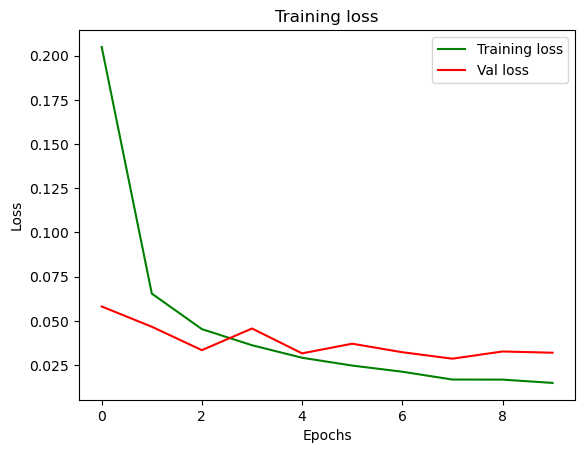

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
plt.plot(history.epoch, history.history["val_loss"], 'r', label='Val loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
test_data_images = np.reshape(test_data.values, (-1,28,28,1))
test_data_images = test_data_images/np.max(test_data_images)

In [14]:
predicted_values_array = model.predict(test_data_images)
predicted_values = np.argmax(predicted_values_array,axis=1)

875/875 [==============================] - 3s 3ms/step


In [15]:
submission = pd.DataFrame({'ImageId': np.arange(1, 28001), 'Label': predicted_values})
submission.to_csv('submission_dig.csv', index=False)